![housesbanner.png](https://storage.googleapis.com/kaggle-competitions/kaggle/5407/media/housesbanner.png)

Time flies! You have now learned and (hopefully) mastered all the skills required to build a real-world ML regression model! These skills include:

- Exploratory data analysis (EDA)
- Data pre-processing and feature engineering: scaling, imputation, encoding...
- A suite of regression models: linear regression, trees, forests, ...
- Hyperparameter tuning: CV, GridSearch...
- Model evaluation

Now it is time to deploy these skills in the real world, build your first "real" ML project, and see how you perform against other data scientists from all over the world!

We will join this active Kaggle competition to predict house prices:


https://www.kaggle.com/c/house-prices-advanced-regression-techniques

You will find the detailed description of the competition from above web site, and can download the data directly there. 

**Requirements:**

- Please use this notebook to create your code, explanation, graphs, and results just like what you did for your homework.
- This is an individual project. You are free to discuss with your classmates but you should complete the project on your own (ie, you cannot copy code...).
- You should create a Kaggle account and submit the prediction of your model in Kaggle individually. Please add "SCU_" in front of your team name so that you can check how you rank among your classmates in the Leaderboard. However, you do not have to use your real name in your team name.
- You can submit your results multiple times in Kaggle. Therefore you are encouraged to submit your model, improve, then re-submit. It is a continuous learning process.
- **Please include a screenshot of your best Kaggle submission at the bottom of this notebook showing your rank and score in the leaderboard.**
- You are also encouraged to read discussion forums to learn and get your inspiration, but code copying is strictly forbidden.
- **Honor code: again, you cannot copy code, neither from classmates nor from any online discussion forums. We will check your code and you may be asked to present in class (so you need to be extremely familiar with your work)!**

### Good luck!

## Load Data 

In [63]:
# # Mount Google Drive
# from google.colab import drive

# drive.mount('/content/drive', force_remount=True)

In [64]:
# import pandas as pd
# pd.set_option('display.max_columns', 500)

# # Read Raw Files
# testFilePath = "/content/drive/My Drive/MSIS2631_ML Fianl Project/test.csv"
# trainFilePath = "/content/drive/My Drive/MSIS2631_ML Fianl Project/train.csv"
# test_raw = pd.read_csv(testFilePath)
# train_raw = pd.read_csv(trainFilePath)

In [65]:
import pandas as pd 
pd.set_option('display.max_columns', 500)
test_raw = pd.read_csv("test.csv")
train_raw = pd.read_csv("train.csv")

## Exploratory Data Analysis & Data Cleaning

### EDA

In [66]:
import numpy as np

In [67]:
test_raw.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [68]:
train_raw.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [69]:
# Since the "Id" column doesn't contribute anything for prediction, we can simply drop it.

# Backup
train_ID = train_raw['Id']
test_ID = test_raw['Id']

# Drop
train_raw.drop("Id", axis = 1, inplace = True)
test_raw.drop("Id", axis = 1, inplace = True)

In [70]:
train_raw.shape

(1460, 80)

In [71]:
train_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [72]:
test_raw.shape

(1459, 79)

In [73]:
test_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   int64  
 1   MSZoning       1455 non-null   object 
 2   LotFrontage    1232 non-null   float64
 3   LotArea        1459 non-null   int64  
 4   Street         1459 non-null   object 
 5   Alley          107 non-null    object 
 6   LotShape       1459 non-null   object 
 7   LandContour    1459 non-null   object 
 8   Utilities      1457 non-null   object 
 9   LotConfig      1459 non-null   object 
 10  LandSlope      1459 non-null   object 
 11  Neighborhood   1459 non-null   object 
 12  Condition1     1459 non-null   object 
 13  Condition2     1459 non-null   object 
 14  BldgType       1459 non-null   object 
 15  HouseStyle     1459 non-null   object 
 16  OverallQual    1459 non-null   int64  
 17  OverallCond    1459 non-null   int64  
 18  YearBuil

In [74]:
categoricalColumns = train_raw.select_dtypes(include=['object']).columns.to_list()
numericalColumns = train_raw._get_numeric_data().columns.to_list()

In [75]:
train_cat_raw = train_raw[categoricalColumns]
train_cat_raw

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,Gd,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1456,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,Plywood,Plywood,Stone,TA,TA,CBlock,Gd,TA,No,ALQ,Rec,GasA,TA,Y,SBrkr,TA,Min1,TA,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
1457,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,CemntBd,CmentBd,None,Ex,Gd,Stone,TA,Gd,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,NaN,GdPrv,Shed,WD,Normal
1458,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,TA,TA,Mn,GLQ,Rec,GasA,Gd,Y,FuseA,Gd,Typ,NaN,Attchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [76]:
train_num_raw = train_raw[numericalColumns]
train_num_raw

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,1999,2000,0.0,0,0,953,953,953,694,0,1647,0,0,2,1,3,1,7,1,1999.0,2,460,0,40,0,0,0,0,0,8,2007,175000
1456,20,85.0,13175,6,6,1978,1988,119.0,790,163,589,1542,2073,0,0,2073,1,0,2,0,3,1,7,2,1978.0,2,500,349,0,0,0,0,0,0,2,2010,210000
1457,70,66.0,9042,7,9,1941,2006,0.0,275,0,877,1152,1188,1152,0,2340,0,0,2,0,4,1,9,2,1941.0,1,252,0,60,0,0,0,0,2500,5,2010,266500
1458,20,68.0,9717,5,6,1950,1996,0.0,49,1029,0,1078,1078,0,0,1078,1,0,1,0,2,1,5,0,1950.0,1,240,366,0,112,0,0,0,0,4,2010,142125


#### Target Examine

In [77]:
target = "SalePrice"
y_train_raw = train_raw[target]

<AxesSubplot:>

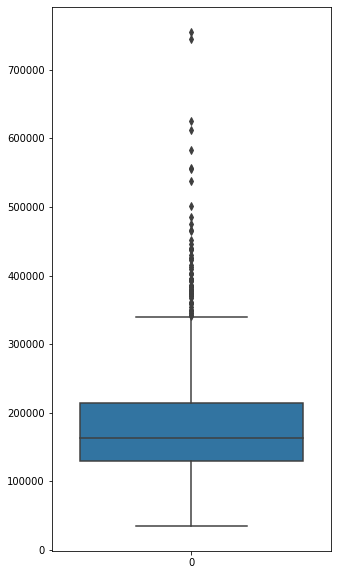

In [78]:
import seaborn as sns
from matplotlib.pyplot import figure
figure(figsize=(5, 10))
sns.boxplot(data = y_train_raw)

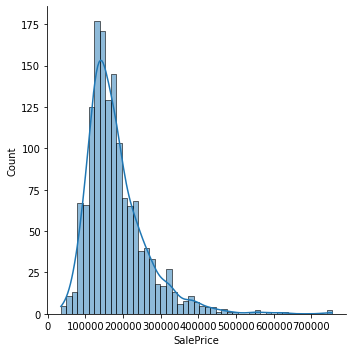

In [79]:
sns.displot(data = y_train_raw, kde=True)

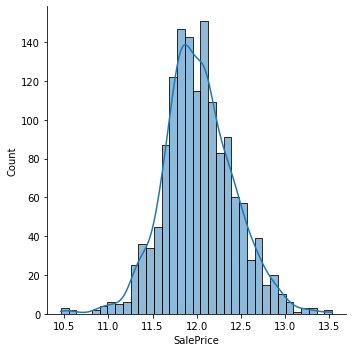

In [80]:
sns.displot(data = np.log1p(y_train_raw), kde=True)

Text(0.5, 1.0, 'Train Column Correlation Heatmap')

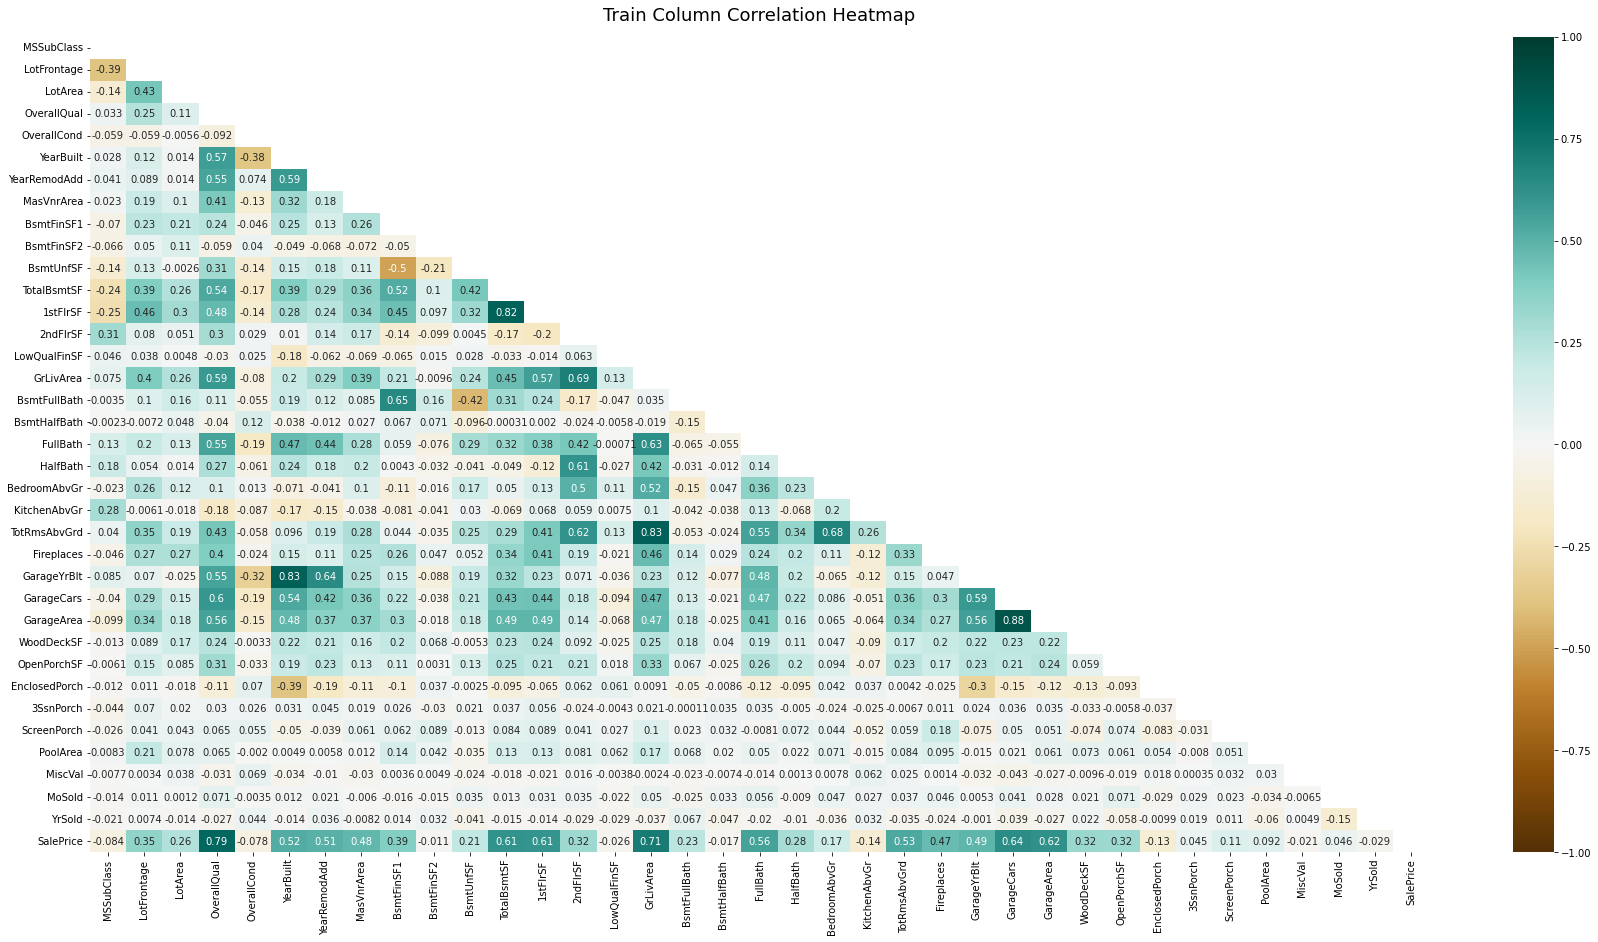

In [81]:
import seaborn as sns
import matplotlib.pylab as plt
from matplotlib.pyplot import figure
%matplotlib inline
figure(figsize=(30, 15))
mask = np.triu(np.ones_like(train_num_raw.corr(), dtype=bool))
heatmap1 = sns.heatmap(train_num_raw.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG', mask=mask)
heatmap1.set_title('Train Column Correlation Heatmap', fontdict={'fontsize':18}, pad=16)

In [82]:
# colRemain = []
# for i in none_conversion:
#     if i[0] not in categoricalColumns:
#         colRemain.append(i)
# colRemain

### Data Cleaning

#### Deal with Single Value Columns

In [83]:
all_raw = pd.concat((train_raw.drop(target, axis=1), test_raw), ignore_index=True)
all_raw

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
2915,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
2916,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
2917,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,CompShg,HdBoard,Wd Shng,None,0.0,TA,TA,PConc,Gd,TA,Av,GLQ,337.0,Un

In [84]:
# If a value accounts for more than 99% of one column, we define the column as single value column, and we can drop it.

singleValueColumns = []

for i in all_raw.columns.unique().tolist():
    if all_raw[i].value_counts(normalize=True).iloc[0] > 0.99:
        singleValueColumns.append(i)

# Show single valew columns
singleValueColumns

['Street', 'Utilities', 'PoolArea']

In [85]:
all_raw = all_raw.drop(singleValueColumns, axis=1)
all_raw

,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,NaN,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,NaN,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,NaN,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,NaN,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,NaN,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,160,RM,21.0,1936,NaN,Reg,Lvl,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
2915,160,RM,21.0,1894,NaN,Reg,Lvl,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
2916,20,RL,160.0,20000,NaN,Reg,Lvl,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
2917,85,RL,62.0,10441,NaN,Reg,Lvl,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,CompShg,HdBoard,Wd Shng,None,0.0,TA,TA,PConc,Gd,TA,Av,GLQ,337.0,Unf,0.0,575.0,912.0,GasA,TA,Y,SBrkr,970,0,0,970,0.0,1.0,1,0,3,1,TA,6,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,80,32,0,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


#### Categorical Data Imputation

Assumptions:

For "SaleType", we assume that Na stands for Warranty Deed - Conventional ("WD")

For "Condition1" and "Condition2", we assume that Na stands for Normal ("Norm")

For "MasVnrType", we assume that Na means no Masonry veneer ("None")

"CentralAir" indicates whether there is central air conditioning. We assume that Na is not having central air conditioning ("N").

For "Electrical", we assume that Na means Standard Circuit Breakers & Romex ("SBrkr")

For "ExterCond", "ExterQual", "KitchenQual", and "HeatingQC", we use Average/Typical ("TA") to impute Na

For "Exterior1st" and "Exterior2nd", we use "VinylSd" to impute.

For "MSZoning", we use "None" to impute.


 From data_description.txt, we know that there are some NAs actually have meanings. Below is the value to impute when there is a Na.

According to data descripion:

When "Alley" is Na, it means that there is no alley access, so we use "None" to impute.

When "Fence" is Na, it means that there is no fence, so we use "None" to impute.

When "PoolQC" is Na, it means that there is no pool, so we use "None" to impute.

The default vale for "Functional" is "Typ" , so we use "Typ" to impute.

When "BsmtQual" is Na, it means that there is No Basement, so we use "None" to impute. And the same goes with "BsmtCond", "BsmtExposure", "BsmtFinType1", and "BsmtFinType2".

When "FireplaceQu" is Na, it means that there is no Fireplace, so we use "None" to impute.

For columns regarding garage, Na means no garage, so we use "None" to impute "GarageType", "GarageFinish", "GarageQual", and "GarageCond".

When "MiscFeature" is Na, it means that there is no misc feature, so we use "None" to impute.



In [86]:
# Make Na conversion list

cat_na_conversion = [("MasVnrType", "None"),
                     ("BsmtQual", "None"), 
                     ("Electrical", "SBrkr"),
                     ("BsmtCond", "None"),
                     ("BsmtExposure", "None"),
                     ("BsmtFinType1", "None"),
                     ("BsmtFinType2", "None"),
                     ("CentralAir", "N"),
                     ("Condition1", "Norm"), 
                     ("Condition2", "Norm"),
                     ("ExterCond", "TA"),
                     ("ExterQual", "TA"), 
                     ("FireplaceQu", "None"),
                     ("GarageType", "None"), 
                     ("GarageFinish", "None"), 
                     ("GarageQual", "None"), 
                     ("GarageCond", "None"), 
                     ("HeatingQC", "TA"), 
                     ("KitchenQual", "TA"), 
                     ("Functional", "Typ"), 
                     ("MSZoning", "None"),
                     ("Exterior1st", "VinylSd"), 
                     ("Exterior2nd", "VinylSd"), 
                     ("SaleType", "WD"),
                     ("PoolQC", "None"),
                     ("Fence", "None"),
                     ("MiscFeature", "None"),
                     ("Alley", "None")]

In [87]:
for colName, toStr in cat_na_conversion:
    all_raw.loc[:, colName] = all_raw.loc[:, colName].fillna(toStr)

all_raw

,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,None,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,None,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,None,None,None,0,2,2008,WD,Normal
1,20,RL,80.0,9600,None,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,None,None,None,0,5,2007,WD,Normal
2,60,RL,68.0,11250,None,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,None,None,None,0,9,2008,WD,Normal
3,70,RL,60.0,9550,None,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,None,None,None,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,None,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,None,None,None,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,160,RM,21.0,1936,None,Reg,Lvl,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,None,None,NaN,None,0.0,0.0,None,None,Y,0,0,0,0,0,None,None,None,0,6,2006,WD,Normal
2915,160,RM,21.0,1894,None,Reg,Lvl,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,None,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,None,None,None,0,4,2006,WD,Abnorml
2916,20,RL,160.0,20000,None,Reg,Lvl,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,None,None,None,0,9,2006,WD,Abnorml
2917,85,RL,62.0,10441,None,Reg,Lvl,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,CompShg,HdBoard,Wd Shng,None,0.0,TA,TA,PConc,Gd,TA,Av,GLQ,337.0,Unf,0.0,575.0,912.0,GasA,TA,Y,SBrkr,970,0,0,970,0.0,1.0,1,0,3,1,TA,6,Typ,0,None,None,NaN,None,0.0,0.0,None,None,Y,80,32,0,0,

In [88]:
# Find numerical colimns with missing values

num_na_col = all_raw.columns[all_raw.isna().any()].tolist()

# ['LotFrontage',
#  'MasVnrArea',
#  'BsmtFinSF1',
#  'BsmtFinSF2',
#  'BsmtUnfSF',
#  'TotalBsmtSF',
#  'BsmtFullBath',
#  'BsmtHalfBath',
#  'GarageYrBlt',
#  'GarageCars',
#  'GarageArea']

#### Numerical Data Imputation

In [89]:
num_to_zero_col = num_na_col.copy()
num_to_zero_col.remove('LotFrontage')
num_to_zero_col

for col in num_to_zero_col:
    all_raw[col] = all_raw[col].fillna(0)

all_raw.columns[all_raw.isna().any()].tolist()

['LotFrontage']

In [90]:
# split train/test for LotFrontage imputation to avoid data leakage
# Train Index: .loc[:len(train_raw)-1, :]
# Test Index: .loc[len(test_raw)+1:, :]

train_raw_Lot = all_raw.loc[:len(train_raw)-1, :]
test_raw_Lot = all_raw.loc[len(test_raw)+1:, :]

train_imputed = train_raw_Lot.copy()
test_imputed = test_raw_Lot.copy()

In [91]:
# It's fair to infer that houses within the same neighborhood have similar LotFrontage. Thus, we use median method to impute.
# Inspired by: https://www.kaggle.com/code/serigne/stacked-regressions-top-4-on-leaderboard/notebook

train_imputed["LotFrontage"] = train_raw_Lot.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

test_imputed["LotFrontage"] = test_raw_Lot.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

In [92]:
train_imputed.isna().sum().max()

0

In [93]:
test_imputed.isna().sum().max()

0

## Feature Engineering

### Preprocessing

There are several numerical columns that are actually have categorical meanings:

YrSold

MoSold

GarageYrBlt

MSSubClass

OverallCond

YearBuilt

We first change them to category

In [94]:
# .loc[:len(train_raw)-1, :]
# .loc[len(test_raw)+1:, :]
all_imputed = pd.concat((train_imputed, test_imputed), ignore_index=True)
all_imputed

,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,None,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,None,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,None,None,None,0,2,2008,WD,Normal
1,20,RL,80.0,9600,None,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,None,None,None,0,5,2007,WD,Normal
2,60,RL,68.0,11250,None,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,None,None,None,0,9,2008,WD,Normal
3,70,RL,60.0,9550,None,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,None,None,None,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,None,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,None,None,None,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,160,RM,21.0,1936,None,Reg,Lvl,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,None,None,0.0,None,0.0,0.0,None,None,Y,0,0,0,0,0,None,None,None,0,6,2006,WD,Normal
2915,160,RM,21.0,1894,None,Reg,Lvl,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,None,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,None,None,None,0,4,2006,WD,Abnorml
2916,20,RL,160.0,20000,None,Reg,Lvl,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,None,None,None,0,9,2006,WD,Abnorml
2917,85,RL,62.0,10441,None,Reg,Lvl,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,CompShg,HdBoard,Wd Shng,None,0.0,TA,TA,PConc,Gd,TA,Av,GLQ,337.0,Unf,0.0,575.0,912.0,GasA,TA,Y,SBrkr,970,0,0,970,0.0,1.0,1,0,3,1,TA,6,Typ,0,None,None,0.0,None,0.0,0.0,None,None,Y,80,32,0,0,

In [95]:
num_to_cat_list = ["GarageYrBlt", "MSSubClass", "OverallCond", "YrSold", "MoSold", "YearBuilt", "YearRemodAdd"]

for i in num_to_cat_list:
    all_imputed[i] = all_imputed[i].astype(str)

In [96]:

all_imputed['TotalArea'] = all_imputed['TotalBsmtSF'] + all_imputed['1stFlrSF'] + all_imputed['2ndFlrSF']

all_imputed['TotalBath'] = (all_imputed['FullBath'] + (0.5 * all_imputed['HalfBath']) +
                               all_imputed['BsmtFullBath'] + (0.5 * all_imputed['BsmtHalfBath']))
all_imputed['TotalBsmtbath'] = all_imputed['BsmtFullBath'] + (0.5 * all_imputed['BsmtHalfBath'])


all_imputed['TotalPorchSF'] = (all_imputed['OpenPorchSF'] + all_imputed['3SsnPorch'] +
                            all_imputed['EnclosedPorch'] + all_imputed['ScreenPorch'] + all_imputed['WoodDeckSF'])

allData = all_imputed.drop(['TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'FullBath', 'HalfBath', 'BsmtFullBath', 'BsmtHalfBath', 'OpenPorchSF', '3SsnPorch', 'EnclosedPorch', 'ScreenPorch', 'WoodDeckSF'], axis=1)

In [97]:
X_train = allData.loc[:len(train_raw)-1, :]
X_test = allData.loc[len(test_raw)+1:, :]

### Categorical

In [98]:
cat_features = allData.select_dtypes(include=['object']).columns.to_list()

# ['MSSubClass',
#  'MSZoning',
#  'Alley',
#  'LotShape',
#  'LandContour',
#  'LotConfig',
#  'LandSlope',
#  'Neighborhood',
#  'Condition1',
#  'Condition2',
#  'BldgType',
#  'HouseStyle',
#  'OverallCond',
#  'YearBuilt',
#  'RoofStyle',
#  'RoofMatl',
#  'Exterior1st',
#  'Exterior2nd',
#  'MasVnrType',
#  'ExterQual',
#  'ExterCond',
#  'Foundation',
#  'BsmtQual',
#  'BsmtCond',
#  'BsmtExposure',
#  'BsmtFinType1',
#  'BsmtFinType2',
#  'Heating',
#  'HeatingQC',
#  'CentralAir',
#  'Electrical',
#  'KitchenQual',
#  'Functional',
#  'FireplaceQu',
#  'GarageType',
#  'GarageYrBlt',
#  'GarageFinish',
#  'GarageQual',
#  'GarageCond',
#  'PavedDrive',
#  'PoolQC',
#  'Fence',
#  'MiscFeature',
#  'MoSold',
#  'YrSold',
#  'SaleType',
#  'SaleCondition']

In [99]:
X_train[cat_features]

,MSSubClass,MSZoning,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,None,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,None,Attchd,2003.0,RFn,TA,TA,Y,None,None,None,2,2008,WD,Normal
1,20,RL,None,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,1976.0,RFn,TA,TA,Y,None,None,None,5,2007,WD,Normal
2,60,RL,None,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,2001.0,RFn,TA,TA,Y,None,None,None,9,2008,WD,Normal
3,70,RL,None,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,1998.0,Unf,TA,TA,Y,None,None,None,2,2006,WD,Abnorml
4,60,RL,None,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,2000.0,RFn,TA,TA,Y,None,None,None,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,None,Reg,Lvl,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,Gd,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,1999.0,RFn,TA,TA,Y,None,None,None,8,2007,WD,Normal
1456,20,RL,None,Reg,Lvl,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,TA,TA,CBlock,Gd,TA,No,ALQ,Rec,GasA,TA,Y,SBrkr,TA,Min1,TA,Attchd,1978.0,Unf,TA,TA,Y,None,MnPrv,None,2,2010,WD,Normal
1457,70,RL,None,Reg,Lvl,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,Ex,Gd,Stone,TA,Gd,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Gd,Attchd,1941.0,RFn,TA,TA,Y,None,GdPrv,Shed,5,2010,WD,Normal
1458,20,RL,None,Reg,Lvl,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,TA,TA,Mn,GLQ,Rec,GasA,Gd,Y,FuseA,Gd,Typ,None,Attchd,1950.0,Unf,TA,TA,Y,None,None,None,4,2010,WD,Normal


In [100]:
ordinal_cat_features = ['FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 'ExterQual', 'ExterCond', 'HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1',
                        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope', 'LotShape', 'MSSubClass', 'OverallCond', "YrSold", "MoSold", "YearBuilt", "YearRemodAdd"]

onehot_cat_features = ['CentralAir', 'PavedDrive']

target_cat_features = list(set(cat_features) - set(ordinal_cat_features) - set(onehot_cat_features))

For all those categorical features, we can use encoder to transform them.

### Numerical

In [101]:
num_features = allData._get_numeric_data().columns.to_list()

# ['LotFrontage',
#  'LotArea',
#  'OverallQual',
#  'MasVnrArea',
#  'BsmtFinSF1',
#  'BsmtFinSF2',
#  'BsmtUnfSF',
#  'LowQualFinSF',
#  'GrLivArea',
#  'BedroomAbvGr',
#  'KitchenAbvGr',
#  'TotRmsAbvGrd',
#  'Fireplaces',
#  'GarageCars',
#  'GarageArea',
#  'MiscVal',
#  'TotalArea',
#  'TotalBath',
#  'TotalBsmtbath',
#  'TotalPorchSF']

In [102]:
X_train[num_features]

,LotFrontage,LotArea,OverallQual,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,LowQualFinSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,MiscVal,TotalArea,TotalBath,TotalBsmtbath,TotalPorchSF
0,65.0,8450,7,196.0,706.0,0.0,150.0,0,1710,3,1,8,0,2.0,548.0,0,2566.0,3.5,1.0,61
1,80.0,9600,6,0.0,978.0,0.0,284.0,0,1262,3,1,6,1,2.0,460.0,0,2524.0,2.5,0.5,298
2,68.0,11250,7,162.0,486.0,0.0,434.0,0,1786,3,1,6,1,2.0,608.0,0,2706.0,3.5,1.0,42
3,60.0,9550,7,0.0,216.0,0.0,540.0,0,1717,3,1,7,1,3.0,642.0,0,2473.0,2.0,1.0,307
4,84.0,14260,8,350.0,655.0,0.0,490.0,0,2198,4,1,9,1,3.0,836.0,0,3343.0,3.5,1.0,276
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,7917,6,0.0,0.0,0.0,953.0,0,1647,3,1,7,1,2.0,460.0,0,2600.0,2.5,0.0,40
1456,85.0,13175,6,119.0,790.0,163.0,589.0,0,2073,3,1,7,2,2.0,500.0,0,3615.0,3.0,1.0,349
1457,66.0,9042,7,0.0,275.0,0.0,877.0,0,2340,4,1,9,2,1.0,252.0,2500,3492.0,2.0,0.0,60
1458,68.0,9717,5,0.0,49.0,1029.0,0.0,0,1078,2,1,5,0,1.0,240.0,0,2156.0,2.0,1.0,478


#### PCA

In [103]:

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler

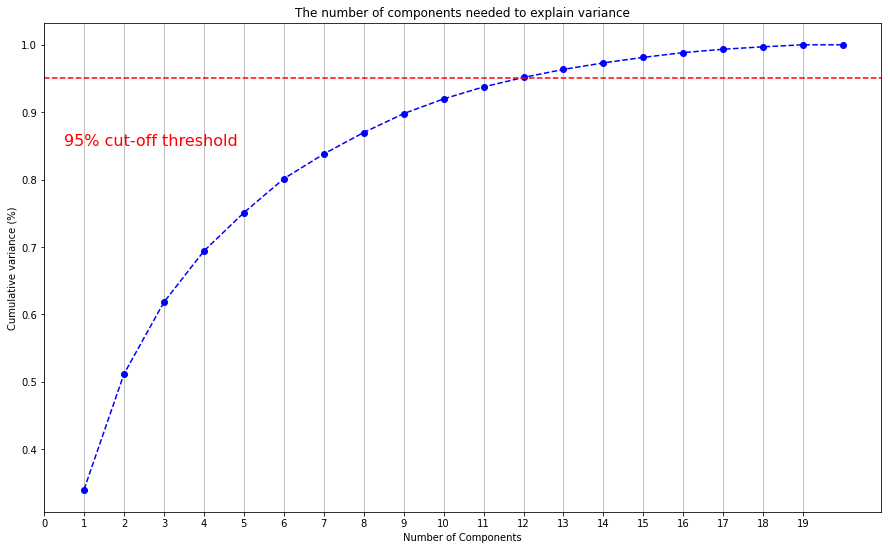

In [104]:
pca_scaled = make_pipeline(RobustScaler(), 
                           MinMaxScaler(),
                           PCA(n_components=len(num_features)))

X_pca_scaled = pca_scaled.fit_transform(X_train[num_features])

xi = np.arange(1, len(num_features)+1, step=1)
y = np.cumsum(pca_scaled.named_steps['pca'].explained_variance_ratio_)

plt.rcParams["figure.figsize"] = (15,9)
fig, ax = plt.subplots()

plt.plot(xi, y, marker='o', linestyle='--', color='b')
plt.xlabel('Number of Components')
plt.xticks(np.arange(0, len(num_features), step=1))
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='--')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

From the above plot, we can see that:

If we use RobustScaler and MinMaxScaler, 12 principal components are able to explain 95% of original variance, so we can set n_component as 12.

By doing PCA, we were able to reduce the data dimension from 19 to 12

P.S

 After model building, it seemed that our models weren't very time-consuming, so, I decided not to use PCA

#### ColumnTransformer Pipeline

In [105]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from category_encoders.target_encoder import TargetEncoder
from sklearn.preprocessing import MinMaxScaler

In [106]:
preprocess = ColumnTransformer(transformers=[('num',
                                              Pipeline(steps=[('scaler1', RobustScaler()),
                                                              ('scaler2', MinMaxScaler()),
                                                              #('pca', PCA(n_components=14))
                                                              ]),
                                              num_features),
                                             ('OneHotCat',
                                              Pipeline(steps=[('encoder1', OneHotEncoder(handle_unknown='ignore'))]),
                                              onehot_cat_features),
                                             ('TargetCat',
                                              Pipeline(steps=[('encoder2', TargetEncoder()),
                                                              ('scaler21', MinMaxScaler())]),
                                             target_cat_features),
                                             ('OrdinalCat',
                                              Pipeline(steps=[('encoder3', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)),
                                                              ('scaler31', MinMaxScaler())]),
                                              ordinal_cat_features)
                                             ])


In [107]:
preprocess.fit_transform(X_train, y_train_raw)

array([[0.15068493, 0.0334198 , 0.66666667, ..., 0.36363636, 0.93693694,
        0.88333333],
       [0.20205479, 0.03879502, 0.55555556, ..., 0.63636364, 0.69369369,
        0.43333333],
       [0.1609589 , 0.04650728, 0.66666667, ..., 1.        , 0.91891892,
        0.86666667],
       ...,
       [0.15410959, 0.03618687, 0.66666667, ..., 0.63636364, 0.3963964 ,
        0.93333333],
       [0.1609589 , 0.03934189, 0.44444444, ..., 0.54545455, 0.45945946,
        0.76666667],
       [0.18493151, 0.04037019, 0.44444444, ..., 0.72727273, 0.59459459,
        0.25      ]])

## Model Build & Tune

In [108]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

In [109]:
from sklearn.preprocessing import OneHotEncoder

In [110]:
from sklearn.linear_model import Lasso, BayesianRidge, LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
import xgboost as xgb
import lightgbm as lgb
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error

#### Hyperparameter Tuning & Comparison

In this part, I built five models: XGBRegressor, RandomForest Regressor, LightGradientBoostRegressor, Lasso, and ElasticNet.

After tuning hyperparameters by using optuna, I choose XGB as my final model.

In [111]:
# pip install optuna

In [112]:
import optuna

##### XGB

In [ ]:
def objective_xgb(trial, X_train, y_train_raw):
    """
    Objective function to tune an `XGBRegressor` model.
    """
    y_train = np.log1p(y_train_raw)

    preprocess = ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler1', RobustScaler()),
                                                                  ('scaler2', StandardScaler()),
                                                                  #('scaler3',MinMaxScaler()),
                                                                  #('pca', PCA(n_components=12))
                                                                  ]),
                                                  num_features),
                                                 
                                                 ('OneHotCat',
                                                  Pipeline(steps=[
                                                      ('encoder1', OneHotEncoder(handle_unknown='ignore'))
                                                      ]),
                                                  onehot_cat_features),
                                                 ('TargetCat',
                                                  Pipeline(steps=[('encoder2', TargetEncoder()),
                                                                  ('scaler21', RobustScaler()),
                                                                  ('scaler22', StandardScaler()),
                                                                  #('scaler23', MinMaxScaler())
                                                                  ]),
                                                  target_cat_features),
                                                 ('OrdinalCat',
                                                  Pipeline(steps=[#('encoder3', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)),
                                                                  ('encoder2', TargetEncoder()),
                                                                  ('scaler31', RobustScaler()),
                                                                  ('scaler32', StandardScaler()),
                                                                #   ('scaler33', MinMaxScaler())
                                                                ]),
                                                  ordinal_cat_features)
                                                 ])

    # Define Parameter Grid to Tune
    params = {
        'n_estimators': trial.suggest_int("n_estimators", 100, 5000),
        'reg_alpha': trial.suggest_loguniform("reg_alpha", 1e-10, 1e-1),
        'reg_lambda': trial.suggest_loguniform("reg_lambda", 1e-8, 100.0),
        "subsample": trial.suggest_float("subsample", 0.8, 1.0, step=0.001),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.1, log=True),
        'max_depth': trial.suggest_int("max_depth", 2, 9),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0, 1.0, step=0.05),
        'colsample_bylevel': trial.suggest_float('colsample_bylevel', 0, 1.0, step=0.05),
        'colsample_bynode': trial.suggest_float('colsample_bynode', 0, 1.0, step=0.05),
        "gamma": trial.suggest_float("gamma", 0, 0.1, step=0.0005),
        "min_child_weight": trial.suggest_int("min_child_weight", 0, 10),
        'nthread': -1,
        'booster': "gbtree",
        'objective': "reg:squarederror",
        'early_stopping_rounds': 300,
        'random_state': 42,
        'eval_metric': "rmse"
    }
    
    # Tune pruning
    # from optuna.integration import XGBoostPruningCallback
    # pruning_callback = XGBoostPruningCallback(trial, "validation_0-rmse")

    
    model = xgb.XGBRegressor(
        # callbacks=[pruning_callback],
        **params
    )
    
    # Check and enable GPU accelerate
    GPU_ENABLED = True
    if GPU_ENABLED:
        params["tree_method"] = "gpu_hist"
        params["predictor"] = "gpu_predictor"

    # K-Fold CV
    kf = KFold(n_splits=5, shuffle=True, random_state=2022)
    kf.split(X_train, y_train)
    rmse = []
    for train_index, valid_index in kf.split(X_train, y_train):
        X_trainS, X_validS = X_train.iloc[train_index], X_train.iloc[valid_index]
        y_trainS, y_validS = y_train.iloc[train_index], y_train.iloc[valid_index]
        X_trainS = preprocess.fit_transform(X_trainS, y_trainS)
        X_validS = preprocess.transform(X_validS)

        model.fit(
            X_trainS,
            y_trainS,
            eval_set=[(X_validS, y_validS)],
            verbose=False
        )
        
        yhat = model.predict(X_validS)
        rmse.append(mean_squared_error(y_validS, yhat, squared=False))
    rmse = sum(rmse) / len(rmse)
    return rmse

study_xgb = optuna.create_study(study_name="XGB Tuner", direction="minimize")
study_xgb.optimize(
    lambda trial: objective_xgb(
        trial,
        X_train,
        y_train_raw),
    n_trials=300)
xgbBestPara = study_xgb.best_params
print(
    f'Best Parameter: {study_xgb.best_params}\nBest Score: {study_xgb.best_value}')

# {'n_estimators': 5876,
#  'reg_alpha': 0.5245111179685926,
#  'reg_lambda': 0.4408558014855486,
#  'subsample': 0.7,
#  'learning_rate': 0.020644924177094043,
#  'max_depth': 2,
#  'colsample_bytree': 0.7176633182559217,
#  'gamma': 0.30000000000000004}


In [121]:
print(
    f'Best Parameter: {study_xgb.best_params}\nBest Score: {study_xgb.best_value}')
optuna.visualization.plot_optimization_history(study_xgb)

Best Parameter: {'n_estimators': 3294, 'reg_alpha': 1.929897932989974e-10, 'reg_lambda': 1.0186659359903715e-07, 'subsample': 0.8460000000000001, 'learning_rate': 0.0123668789206247, 'max_depth': 3, 'colsample_bytree': 0.30000000000000004, 'colsample_bylevel': 0.6000000000000001, 'colsample_bynode': 0.75, 'gamma': 0.007, 'min_child_weight': 0}
Best Score: 0.11385928560228975


In [119]:
optuna.visualization.plot_param_importances(study_xgb)

In [122]:
optuna.visualization.plot_slice(study_xgb)

##### Random Forest

In [ ]:
def objective_rf(trial, X_train, y_train_raw):
    """
    Objective function to tune an `RandomForestRegressor` model.
    """
    
    y_train = np.log1p(y_train_raw)

    preprocess = ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler1', RobustScaler()),
                                                                  #('scaler2', StandardScaler()),
                                                                  ('scaler3',MinMaxScaler()),
                                                                  #('pca', PCA(n_components=12))
                                                                  ]),
                                                  num_features),
                                                 
                                                 ('OneHotCat',
                                                  Pipeline(steps=[
                                                      ('encoder1', OneHotEncoder(handle_unknown='ignore'))
                                                      ]),
                                                  onehot_cat_features),
                                                 ('TargetCat',
                                                  Pipeline(steps=[('encoder2', TargetEncoder()),
                                                                  #('scaler21', RobustScaler()),
                                                                  #('scaler22', StandardScaler()),
                                                                  ('scaler23', MinMaxScaler())
                                                                  ]),
                                                  target_cat_features),
                                                 ('OrdinalCat',
                                                  Pipeline(steps=[#('encoder3', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)),
                                                                  ('encoder2', TargetEncoder()),
                                                                #   ('scaler31', RobustScaler()),
                                                                #   ('scaler32', StandardScaler()),
                                                                  ('scaler33', MinMaxScaler())
                                                                ]),
                                                  ordinal_cat_features)
                                                 ])

    params = {
        'n_estimators': trial.suggest_categorical('n_estimators', [200, 225, 250, 350, 400, 475, 500, 550, 600, 750, 1000]),
        'max_features': trial.suggest_uniform('max_features', 0.1, 1.0),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 14),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 14),
        'max_samples': trial.suggest_uniform('max_samples', 0.01, 1)
    }

    model = RandomForestRegressor(n_jobs=-1,
                                  **params)
    
    modelP = Pipeline(steps = [("pre", preprocess),
                               ("model", model)
                               ])

    rmse = np.sqrt(-cross_val_score(modelP, X_train, y_train, 
                                    n_jobs=-1, 
                                    cv=5, 
                                    scoring="neg_mean_squared_error")).mean()
    return rmse


study_rf = optuna.create_study(direction="minimize")
study_rf.optimize(
    lambda trial: objective_rf(
        trial,
        X_train,
        y_train_raw),
    n_trials=300)

rfBestPara = study_rf.best_params
print(
    f'Best Parameter: {study_rf.best_params}\nBest Score: {study_rf.best_value}')

In [ ]:
print(
    f'Best Parameter: {study_rf.best_params}\nBest Score: {study_rf.best_value}')
optuna.visualization.plot_optimization_history(study_rf)

Best Parameter: {'n_estimators': 1000, 'max_features': 0.34022444135739704, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_samples': 0.975952845119492}
Best Score: 0.13323586199484547


In [ ]:
optuna.visualization.plot_param_importances(study_rf)

In [ ]:
optuna.visualization.plot_slice(study_rf)

##### Light Gbm

In [ ]:
def objective_lgb(trial, X_train, y_train_raw):
    """
    Objective function to tune an `lgb` model.
    """
    
    y_train = np.log1p(y_train_raw)
    
    preprocess = ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler1', RobustScaler()),
                                                                  ('scaler2', StandardScaler()),
                                                                #   ('scaler3',MinMaxScaler()),
                                                                #   ('pca', PCA(n_components=12))
                                                                  ]),
                                                  num_features),
                                                 
                                                 ('OneHotCat',
                                                  Pipeline(steps=[
                                                      ('encoder1', OneHotEncoder(handle_unknown='ignore'))
                                                      ]),
                                                  onehot_cat_features),
                                                 ('TargetCat',
                                                  Pipeline(steps=[('encoder2', TargetEncoder()),
                                                                  ('scaler21', RobustScaler()),
                                                                  ('scaler22', StandardScaler()),
                                                                #   ('scaler23', MinMaxScaler())
                                                                  ]),
                                                  target_cat_features),
                                                 ('OrdinalCat',
                                                  Pipeline(steps=[#('encoder3', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)),
                                                                  ('encoder2', TargetEncoder()),
                                                                  ('scaler31', RobustScaler()),
                                                                  ('scaler32', StandardScaler()),
                                                                #   ('scaler33', MinMaxScaler())
                                                                ]),
                                                  ordinal_cat_features)
                                                 ])

    # Define Parameter Grid to Tune
    params = {
        'objective': 'regression',
        'metric': 'mean_absolute_error',
        'verbosity': -1,
        'boosting_type': 'gbdt',
        'reg_alpha': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
        'reg_lambda': trial.suggest_loguniform('lambda_l2', 1e-8, 10.0),
        'num_leaves': trial.suggest_int('num_leaves', 2, 512),
        # 'learning_rate': trial.suggest_loguniform('learning_rate', 1e-8, 1.0),
        'learning_rate': 0.01,
        'n_estimators': trial.suggest_int('n_estimators', 700, 3000),
        #'feature_fraction': trial.suggest_uniform('feature_fraction', 0.4, 1.0),
        #'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.4, 1.0),
        #'bagging_freq': trial.suggest_int('bagging_freq', 1, 7),
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 100)
        }

    # Check and enable GPU accelerate
    # if GPU_ENABLED:
    #     params["tree_method"] = "gpu_hist"
    #     params["predictor"] = "gpu_predictor"

    # Tune pruning
    from optuna.integration import LightGBMPruningCallback
    
    pruning_callback = LightGBMPruningCallback(trial, "roc")


    
    model = lgb.LGBMRegressor(
        random_state=42,
        **params
    )
    
    callbacks = [lgb.early_stopping(300, verbose=0), lgb.log_evaluation(period=0)]
    
    # K-Fold CV
    kf = KFold(n_splits=5, shuffle=True, random_state=2022)
    kf.split(X_train, y_train)
    rmse = []
    for train_index, valid_index in kf.split(X_train, y_train):
        X_trainS, X_validS = X_train.iloc[train_index], X_train.iloc[valid_index]
        y_trainS, y_validS = y_train.iloc[train_index], y_train.iloc[valid_index]
        X_trainS = preprocess.fit_transform(X_trainS, y_trainS)
        X_validS = preprocess.transform(X_validS)

        model.fit(
            X_trainS,
            y_trainS,
            eval_set=[(X_validS, y_validS)],
            callbacks=callbacks
        )
        
        yhat = model.predict(X_validS)
        rmse.append(mean_squared_error(y_validS, yhat, squared=False))
    rmse = sum(rmse) / len(rmse)
    return rmse

study_lgb = optuna.create_study(direction="minimize")
study_lgb.optimize(
    lambda trial: objective_lgb(
        trial,
        X_train,
        y_train_raw),
    n_trials=300)
lgbBestPara = study_lgb.best_params
print(f'Best Parameter: {study_lgb.best_params}\nBest Score: {study_lgb.best_value}')

In [ ]:
print(f'Best Parameter: {study_lgb.best_params}\nBest Score: {study_lgb.best_value}')
optuna.visualization.plot_optimization_history(study_lgb)


Best Parameter: {'lambda_l1': 0.0004628020615569601, 'lambda_l2': 0.056056913570958836, 'num_leaves': 8, 'n_estimators': 2152, 'min_child_samples': 9}
Best Score: 0.12509514948986328


In [ ]:
optuna.visualization.plot_param_importances(study_lgb)

##### Lasso

##### ElasticNet

In [ ]:
from sklearn.linear_model import ElasticNet


def objective_elas(trial, X_train, y_train_raw):
    """
    Objective function to tune an `ElasticNet` model.
    """
    
    y_train = np.log1p(y_train_raw)
    
    preprocess = ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler1', RobustScaler()),
                                                                  ('scaler2',MinMaxScaler()),
                                                                  #('pca', PCA(n_components=14))
                                                                  ]),
                                                  num_features),
                                                 ('OneHotCat',
                                                  Pipeline(
                                                      steps=[('encoder1', OneHotEncoder(handle_unknown='ignore'))]),
                                                  onehot_cat_features),
                                                 ('TargetCat',
                                                  Pipeline(steps=[('encoder2', TargetEncoder()),
                                                                  ('scaler21', MinMaxScaler())]),
                                                  target_cat_features),
                                                 ('OrdinalCat',
                                                  Pipeline(steps=[('encoder3', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)),
                                                                  ('scaler31', MinMaxScaler())]),
                                                  ordinal_cat_features)
                                                 ])

    # Define Parameter Grid to Tune
    params = {
        'alpha': trial.suggest_float('alpha', 0.011, 5, step=0.001),
        'l1_ratio': trial.suggest_float('l1_ratio', 0.002, 1, step=0.001)
    }

    # Check and enable GPU accelerate
    # if GPU_ENABLED:
    #     params["tree_method"] = "gpu_hist"
    #     params["predictor"] = "gpu_predictor"

    model = ElasticNet(
        random_state=44,
        max_iter=100000000,
        **params
    )

    # K-Fold CV
    kf = KFold(n_splits=5, shuffle=True, random_state=2022)
    kf.split(X_train, y_train)
    rmse = []
    for train_index, valid_index in kf.split(X_train, y_train):
        X_trainS, X_validS = X_train.iloc[train_index], X_train.iloc[valid_index]
        y_trainS, y_validS = y_train.iloc[train_index], y_train.iloc[valid_index]
        X_trainS = preprocess.fit_transform(X_trainS, y_trainS)
        X_validS = preprocess.transform(X_validS)

        model.fit(
            X_trainS,
            y_trainS
        )

        yhat = model.predict(X_validS)
        rmse.append(mean_squared_error(y_validS, yhat, squared=False))
    rmse = sum(rmse) / len(rmse)
    return rmse


study_elas = optuna.create_study(direction="minimize")
study_elas.optimize(
    lambda trial: objective_elas(
        trial,
        X_train,
        y_train_raw),
    n_trials=300)
elasBestPara = study_elas.best_params
print(f'Best Parameter: {study_elas.best_params}\nBest Score: {study_elas.best_value}')


In [ ]:
print(f'Best Parameter: {study_elas.best_params}\nBest Score: {study_elas.best_value}')
optuna.visualization.plot_optimization_history(study_elas)


## File Output

In [123]:
xgbBestPara = study_xgb.best_params
def GetXGBPred(X_train, y_train_raw, xgbBestPara):

  preprocess = ColumnTransformer(transformers=[('num',
                                                Pipeline(steps=[('scaler1', RobustScaler()),
                                                                ('scaler2', StandardScaler()),
                                                                # ('scaler3', MinMaxScaler()),
                                                                #('pca', PCA(n_components=12))
                                                                ]),
                                                num_features),

                                               ('OneHotCat',
                                                Pipeline(steps=[
                                                    ('encoder1', OneHotEncoder(
                                                         handle_unknown='ignore'))
                                                ]),
                                                onehot_cat_features),
                                               ('TargetCat',
                                                Pipeline(steps=[('encoder2', TargetEncoder()),
                                                                ('scaler21', RobustScaler()),
                                                                ('scaler22', StandardScaler()),
                                                                # ('scaler23', MinMaxScaler())
                                                                ]),
                                                target_cat_features),
                                               ('OrdinalCat',
                                                Pipeline(steps=[  # ('encoder3', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)),
                                                      ('encoder2', TargetEncoder()),
                                                      ('scaler31', RobustScaler()),
                                                      ('scaler32', StandardScaler()),
                                                    # ('scaler33', MinMaxScaler())
                                                ]),
                                                ordinal_cat_features)
                                               ])

  xgbRaw = xgb.XGBRegressor(
      booster="gbtree",
      objective="reg:squarederror",
      random_state=42,
      **xgbBestPara
  )

  modelXGB = Pipeline(steps=[("pre", preprocess),
                             ("model", xgbRaw)
                             ])

  y_train = np.log1p(y_train_raw)

  modelXGB.fit(X_train, y_train)
  y_predXGB = np.expm1(modelXGB.predict(X_test))
  return y_predXGB


y_predXGB = GetXGBPred(X_train, y_train_raw, study_xgb.best_params)
XGBcsv = test_raw.copy()
XGBcsv['SalePrice'] = y_predXGB
XGBcsv['Id'] = test_ID
XGBcsv[['Id', 'SalePrice']].set_index('Id').to_csv('XGB.csv')


![Ranking Result](resultSCU.png)